### 1、Python处理文本数据
文本数据--python的字符串
- 最常用的数据类型之一
- 不可变序列

In [2]:
# 字符串引号

str1 = "abc"
str2 = 'abc'
str3 = 'my name is "Chentian"'
# 双引号单引号无区别，但文本中有引号的时候要相互交替使用
str4 = '''hello! how are you?
         I`m fine, thank you.'''
print(str1)
print(str4)

abc
hello! how are you?
         I`m fine, thank you.


In [4]:
# 转义字符：
print('\'','\"') # 分别输出单引号，双引号
print('hello\nhow do you do?') #输出换行
print('\\') #输出反斜杆，所以路径用“/”或者“\\”

' "
hello
how do you do?
\


In [7]:
# 字符串作为 “不可变序列” ————通用功能
print('a' in 'abc') #判断是否存在
print('我很帅' + "没错") #文本连接
print('handsome ' * 4) #文本复制

True
我很帅没错
handsome handsome handsome handsome 


In [9]:
# 索引、切片、步长
st = 'abcdefg'
print(st[2],st[-1])
print(st[:2])
print(st[::2])

c g
ab
aceg


In [16]:
# 计算字符串长度
print('st长度为：', len(st))
print('st长度为：'+str(len(st)))

st长度为： 7
st长度为：7


In [18]:
# .index()方法
print(st.index('c'))

2


In [20]:
# str.replace(old, new, count):修改字符串，count：更换几个
st = "I'm handsome!"
st2 = st.replace('handsome','ugly')
print(st,st2)
st = "hahahahaha"
st2 = st.replace('ha','he',2)
print(st)
print(st2)

I'm handsome! I'm ugly!
hahahahaha
hehehahaha


In [27]:
# str.split(obj): 拆分字符串，生成列表

st = 'poi01,116.446238,39.940166'
lst = st.split(',')
print(lst)


['poi01', '116.446238', '39.940166']


In [28]:
# 一些常用的内置函数
st = 'aBDEAjc kLM'
print(st.upper()) #大写
print(st.lower()) #小写
print(st.swapcase()) #大小写互换
print(st.capitalize()) # 首字母大写

ABDEAJC KLM
abdeajc klm
AbdeaJC Klm
Abdeajc klm


In [34]:
# 格式化字符： 在字符串中插入变量
name = "FATBIRD"
truth = "%s is 好人" % name
print(truth)

x = 4
y = "haha"
z = 4.5
print("%d" % x)
print("%s" % y)
print("%.2f" % z) # 只输出2位小数，4舍5入

FATBIRD is 好人
4
haha
4.50


### 2、Pandas处理文本数据方法
Pandas 针对字符串配备的一套方法，使其易于对数组的每个元素进行操作

In [38]:
import pandas as pd
import numpy as np
print("导入成功")

导入成功


In [40]:
df = pd.DataFrame({'key1':list('abcdef'),
                  'key2':['hee','fv','w','hija','1123',np.nan]})
df

,key1,key2
0,a,hee
1,b,fv
2,c,w
3,d,hija
4,e,1123
5,f,NaN


In [44]:
# 直接通过.str调用字符串方法
df['key2'].str.upper()
#df['key2']

0     HEE
1      FV
2       W
3    HIJA
4    1123
5     NaN
Name: key2, dtype: object

In [47]:
# 自动过滤NaN值
df.columns = df.columns.str.upper()
df

,KEY1,KEY2
0,a,hee
1,b,fv
2,c,w
3,d,hija
4,e,1123
5,f,NaN


In [57]:
# 字符串索引

df['key3'] = df['KEY2'].str[-1]
df['key4'] = df['KEY2'].str[:2]
df

,KEY1,KEY2,key3,key4
0,a,hee,e,he
1,b,fv,v,fv
2,c,w,w,w
3,d,hija,a,hi
4,e,1123,3,11
5,f,NaN,NaN,NaN


In [58]:
# 字符串常用方法（1）-- lower, upper, len, startswith, endswith
df = pd.DataFrame({'key1':list('abcdef'),
                  'key2':['hee','fv','w','hija','123',np.nan]})
print(df['key1'].str.lower(),'→ lower小写\n')
print(df['key1'].str.upper(),'→ upper大写\n')
print(df['key1'].str.len(),'→ len字符长度\n')
print(df['key1'].str.startswith('b'),'→ 判断起始是否为a\n')
print(df['key2'].str.endswith('3'),'→ 判断结束是否为3\n')

0    a
1    b
2    c
3    d
4    e
5    f
Name: key1, dtype: object → lower小写

0    A
1    B
2    C
3    D
4    E
5    F
Name: key1, dtype: object → upper大写

0    1
1    1
2    1
3    1
4    1
5    1
Name: key1, dtype: int64 → len字符长度

0    False
1     True
2    False
3    False
4    False
5    False
Name: key1, dtype: bool → 判断起始是否为a

0    False
1    False
2    False
3    False
4     True
5      NaN
Name: key2, dtype: object → 判断结束是否为3



In [61]:
# 字符串常用方法（2） -- replace
df['key2_2'] = df['key2'].str.replace('h','呵呵呵')
df

,key1,key2,key2_2
0,a,hee,呵呵呵ee
1,b,fv,fv
2,c,w,w
3,d,hija,呵呵呵ija
4,e,123,123
5,f,NaN,NaN


In [63]:
# 字符串常用方法（3） - split
df = pd.DataFrame({'key':['a,b,c','1,2,3',['a,,,c'],np.nan]})
df

,key
0,"a,b,c"
1,"1,2,3"
2,"[a,,,c]"
3,NaN


In [64]:
df['key'].str.split(',')

0    [a, b, c]
1    [1, 2, 3]
2          NaN
3          NaN
Name: key, dtype: object

In [66]:
df['v1'] = df['key'].str.split(',').str[0]
df['v2'] = df['key'].str.split(',').str[1]
df['v3'] = df['key'].str.split(',').str[2]
df

,key,v1,v2,v3
0,"a,b,c",a,b,c
1,"1,2,3",1,2,3
2,"[a,,,c]",NaN,NaN,NaN
3,NaN,NaN,NaN,NaN


### 3、案例实现：星座运势文本数据处理
词性标注网址：corpus.zhonghuayuwen.org/CpsWParser.aspx

In [69]:
# 情感字符提取
words = '结识/v  到/v  不少/a  新/a  的/u  朋友/n  ，/w  充分/a  发挥/v  你/r  在/p  社交/v  方面/n  的/u  能力/n  ，/w  拓展/v  自己/r  的/u  朋友/n  圈/n  。/w  晚上/nt  会/vu  跟/c  朋友/n  相约/v  到/v  环境/n  优雅/a  的/u  餐厅/n  吃饭/v  ，/w  但是/c  如果/c  要/vu  喝酒/v  的话/u  ，/w  切/v  莫/d  贪杯/v  。/w  今天/nt  心情/n  有些/m  不/d  稳定/a  ，/w  或是/vl  对/a  他人/r  有/v  怀疑/v  ，/w  在/p  待人/v  处事/v  方面/n  会/vu  显得/v  比较/v  保守/a  。/w  有些/m  事情/n  会/vu  让/p  你/r  花费/v  较/v  多/a  的/u  脑力/n  ，/w  例如/v  在/p  与/c  客户/n  沟通/v  的/u  问题/n  上/nd  ，/w  怎么/r  也/d  说/v  不通/v  。/w  与/c  朋友/n  、/w  家人/n  之间/nd  的/u  关系/n  很/d  容易/a  闹僵/v  ，/w  不要/vu  为了/p  小事/n  而/c  动怒/v  。/w  工作/n  中/nd  每天/r  都/d  充满/v  了/u  变数/n  ，/w  再/d  加上/v  临近/v  过年/v  时间/n  会/vu  比较/v  紧张/a  ，/w  自己/r  要/vu  多/a  把/p  控/v  了/u  。/w  最近/nt  与/c  恋人/n  相处/v  时间/n  不/d  多/a  ，/w  尽管/d  对方/n  嘴上/nl  没/d  说/v  什么/r  ，/w  不过/c  心里/nl  已经/d  隐隐约约/a  地/u  有/v  愤怒/a  的/u  小/a  火苗/n  在/p  跳动/v  了/u  。/w  最近/nt  很/d  喜欢/v  一个/r  人/n  呆/a  着/u  ，/w  喜欢/v  这种/r  四周/nl  都/d  安静/a  的/u  氛围/n  ，/w  不过/c  时间/n  一/m  长/n  也/d  会/vu  有/v  空虚/a  的/u  感觉/v  。/w  在/p  这个/r  新年/nt  期间/nt  经常/a  会/vu  被/p  问到/v  许多/a  问题/n  ，/w  让/p  你/r  身心/n  都/d  觉得/v  好/a  累/v  哦/e  ！/w  晚上/nt  可以/vu  早/a  一点/mq  去/v  休息/v  ，/w  放松/v  一下/mq  。/w  今天/nt  做/v  什么/r  都/d  要/vu  量力/v  而/c  为/p  ，/w  在/p  工作/n  中/nd  记得/v  要/vu  少/a  说话/v  多/a  办事/v  ，/w  勤勤恳恳/a  的/u  工作/n  态度/n  会/vu  让/p  你/r  更有/v  人缘/n  ，/w  领导/n  也/d  会/vu  看/v  在/p  眼中/nl  的/u  。/w  单身/n  者/k  不能/vu  因为/c  寂寞/a  就/d  谈恋爱/v  ，/w  更/d  不能/vu  错过/v  那位/r  真正/a  对/a  你/r  好/a  的/u  人/n  。/w  今天/nt  需要/v  抽空/v  外出/v  办/v  些/q  事/n  ，/w  之后/nt  有/v  机会/n  好好/d  休息/v  一下/mq  。/w  平时/nt  各种/r  基金/n  投资/v  你/r  不太/d  关注/v  ，/w  你/r  更/d  感兴趣/v  的/u  是/vl  各种/r  有/v  收藏/v  价值/n  的/u  东西/n  。/w  对/a  爱人/n  的/u  工作/n  还有/v  身体/n  健康/a  都/d  格外/d  关心/v  ，/w  这/r  也/d  让/p  对方/n  感到/v  满足/a  和/c  幸福/a  。/w  周末/nt  安静/a  舒适/a  的/u  环境/n  让/p  你/r  全身心/n  都/d  感到/v  放松/v  ，/w  有/v  难得/a  的/u  轻松/a  休闲/v  时刻/d  ，/w  享受/v  着/u  愉快/a  的/u  周日/nt  。/w  会/vu  想/v  要/vu  满足/a  自己/r  的/u  口腹/n  之/u  欲/n  ，/w  外出/v  逛街/v  会/vu  买/v  不少/a  喜欢/v  的/u  东西/n  ，/w  或是/vl  吃吃喝喝/v  ，/w  从而/c  增加/v  了/u  消费/v  。/w  今天/nt  对于/p  职/n  场上/nl  的/u  任何/r  变动/v  都/d  无须/d  过分/a  紧张/a  ，/w  接下来/v  的/u  状况/n  会/vu  慢慢/a  变/v  好/a  ，/w  努力/v  工作/n  会/vu  让/p  你/r  过/vd  得/u  充实/a  ，/w  就是/r  感到/v  有点/d  疲劳/a  。/w  爱情/n  上/nd  ，/w  想/v  要/vu  确定/v  心上人/n  的/u  心意/n  ，/w  建议/v  早点/n  问/v  清楚/a  ，/w  不要/vu  胡乱/d  猜想/v  。/w  运/v  势/n  普通/a  ，/w  可能/vu  会/vu  遇到/v  一些/m  避免/v  不了/v  的/u  麻烦/a  ，/w  心态/n  最/d  关键/n  ，/w  只要/vu  把/p  自己/r  的/u  心态/n  调整/v  好/a  ，/w  应该/vu  能/vu  妥善/a  解决/v  自己/r  所/u  遇到/v  的/u  难题/n  。/w  若是/c  感情/n  中/nd  出现/v  第三者/n  ，/w  不要/vu  一味/d  地/u  把/p  问题/n  推到/v  恋人/n  身上/nl  。/w  今天/nt  部分/n  人会/ns  有/v  出差/v  任务/n  ，/w  会/vu  感觉/v  比较/v  辛苦/a  ，/w  但/c  若/c  能/vu  寄/v  工作/n  于/p  娱乐/v  ，/w  就/d  会/vu  显得/v  轻松/a  一些/m  。/w  爱情/n  运/v  势/n  欠佳/a  ，/w  本来/d  进展/v  顺利/a  的/u  恋情/n  有可能/v  会/vu  出现/v  问题/n  。/w  破财/v  机率/n  较/v  大/a  ，/w  投资/v  有/v  风险/n  ，/w  万事/n  需/v  谨慎/a  。/w  今天/nt  很多/a  事情/n  都是/r  徒劳无功/i  ，/w  感觉/v  很/d  不爽/a  。/w  感情/n  傻/a  女/n  特别/d  喜欢/v  猜忌/v  ，/w  对/a  另/r  一半/m  产生/v  了/u  不安全感/n  ，/w  这样/r  易/a  惹起/v  对方/n  的/u  不满/a  。/w  理财/v  投资/v  需/v  谨慎/a  ，/w  但是/c  顾虑/v  太多/a  可是/d  会/vu  错失/n  良机/n  ，/w  力度/n  需要/v  把握/v  好/a  。/w  在/p  人际/nl  交往/v  中/nd  ，/w  可能/vu  会/vu  说/v  错话/n  ，/w  做错/v  事/n  ，/w  虽然/c  今天/nt  心情/n  不错/a  ，/w  但是/c  却/d  极/d  易/a  说出/v  一些/m  不/d  该/vu  说/v  的话/u  ，/w  在/p  做事/v  时/nt  ，/w  可能/vu  也/d  会/vu  因为/c  粗心/a  草率/a  ，/w  犯/v  下/nd  一些/m  本/n  可以/vu  避免/v  的/u  错误/n  ，/w  时刻/d  要/vu  谨记/v  ，/w  不要/vu  去/v  说/v  一些/m  不/d  该/vu  说/v  的话/u  ，/w  更/d  不要/vu  口/n  不择/v  言/v  。/w  稳定/a  的/u  一天/r  ，/w  非常/d  适合/v  行动/n  ，/w  无论/c  做/v  什么/r  ，/w  只要/vu  你/r  肯/vu  花/n  精力/n  成功率/n  就/d  很/d  大/a  。/w  很多/a  事/n  只要/vu  你/r  去/v  做/v  都会/vu  有/v  个/q  不错/a  的/u  结果/n  ，/w  虽然/c  偶尔/d  也/d  会/vu  遇到/v  让/p  你/r  比较/v  排斥/v  的/u  事/n  ，/w  但/c  似乎/d  你/r  还是/d  会/vu  继续/v  做/v  下去/v  。/w  幸运/a  今天/nt  属于/v  你/r  ，/w  今天/nt  不论/c  你/r  做/v  什么/r  事情/n  ，/w  都会/vu  觉得/v  颇/d  有/v  收获/v  ，/w  所以/c  ，/w  你/r  可以/vu  尝试/v  着/u  顺势/d  而/c  为/p  ，/w  在/p  某些/r  事情/n  上/nd  ，/w  倘若/c  你/r  愿意/vu  为/p  之/u  付出/v  努力/v  的话/u  ，/w  往往/d  就/d  能够/vu  事半功倍/i  ，/w  一些/m  你/r  认为/v  自己/r  帮/v  不到/v  的/u  事情/n  ，/w  也/d  能够/vu  顺利/a  地/u  完成/v  。/w  今天/nt  ，/w  白羊/n  座/q  要/vu  树立/v  信心/n  ，/w  正视/v  眼前/nl  的/u  困难/n  ，/w  困难/n  总得/vu  要/vu  去/v  面对/v  ，/w  放松/v  心态/n  ，/w  尽量/d  让/p  自己/r  以/p  一个/r  乐观/a  的/u  心态/n  去/v  面对/v  眼前/nl  的/u  困难/n  。/w  不过/c  ，/w  你/r  也/d  不/d  需要/v  一/m  心急/a  着/u  解决/v  眼前/nl  的/u  问题/n  ，/w  建议/v  你/r  先/d  想/v  清楚/a  ，/w  自己/r  应该/vu  怎么/r  做/v  。/w  听到/v  一些/m  鼓励/v  和/c  肯定/d  的/u  声音/n  ，/w  会/vu  让/p  今天/nt  的/u  你/r  心情/n  变/v  得/u  不/d  一样/a  ，/w  给/p  你/r  适当/a  的/u  鼓励/v  ，/w  便/a  可以/vu  带/n  你/r  走出/v  思维/n  的/u  困顿/a  。/w  今天/nt  ，/w  他人/r  的/u  鼓励/v  对于/p  你/r  来说/v  可以/vu  起到/v  很/d  大/a  的/u  帮助/v  作用/n  ，/w  若是/c  一/m  起床/v  能够/vu  听到/v  或/d  看到/v  鼓励/v  的/u  话语/n  ，/w  在/p  这/r  一天/r  里/nd  你/r  都会/vu  充满/v  正/a  能量/n  。/w  你/r  可能/vu  会/vu  制定/v  过/vd  高/a  、/w  过远/a  的/u  目标/n  ，/w  在/p  之后/nt  的/u  时间/n  里/nd  ，/w  不论/c  自己/r  怎么/r  努力/v  ，/w  自己/r  也/d  难以/d  实现/v  那个/r  目标/n  ，/w  而且/c  它/r  还/d  可能/vu  让/p  你/r  迷失/v  方向/n  ，/w  逐渐/d  失去/v  前进/v  的/u  动力/n  。/w  你/r  应该/vu  提醒/v  自己/r  ，/w  做/v  一个/r  脚踏实地/i  的/u  人/n  ，/w  不要/vu  陷进/v  好高骛远/i  的/u  泥潭/n  里/nd  。/w  最好/a  的/u  礼貌/n  是/vl  不/d  多管闲事/i  ，/w  即便是/c  你/r  与/c  对方/n  关系/n  不错/a  ，/w  也/d  不要/vu  什么/r  事情/n  都/d  去/v  管/v  ，/w  更/d  不要/vu  去/v  管/v  旁人/n  的/u  闲事/n  ，/w  今天/nt  ，/w  若是/c  你/r  忍不住/v  去/v  管/v  他人/r  的/u  事情/n  ，/w  这/r  不仅/c  会/vu  让/p  人/n  觉得/v  非常/d  不/d  舒服/a  ，/w  还/d  会/vu  让/p  人/n  对/a  你/r  心/n  生/v  反感/a  ，/w  你/r  又/d  何必/d  呢/u  ！/w  今天/nt  ，/w  你/r  在/p  做事/v  的/u  时候/n  是/vl  比较/v  容易/a  出错/v  的/u  ，/w  当/p  错误/n  形成/v  后/nd  ，/w  你/r  得/u  承担/v  或/d  大/a  或/d  小/a  的/u  后果/n  。/w  在/p  做事/v  的/u  过程/n  中/nd  ，/w  不论/c  事情/n  有/v  多/a  急/a  ，/w  建议/v  你/r  保持/v  沉着/a  ，/w  冷静/a  ，/w  因为/c  你/r  若是/c  心里/nl  着急/v  的话/u  就/d  容易/a  出错/v  ，/w  在/p  这种/r  情况/n  下/nd  ，/w  你/r  怎么/r  可能/vu  把/p  事情/n  做好/v  呢/u  ？/w  今天/nt  ，/w  你/r  所/u  说出/v  的/u  一些/m  话/n  ，/w  或者是/v  你/r  的/u  行事/v  方式/n  ，/w  可能/vu  会/vu  引起/v  他人/r  不满/a  ，/w  与其/c  抱怨/v  ，/w  倒不如/v  从/p  自己/r  身上/nl  找/v  原因/n  ，/w  抱怨/v  是/vl  一种/r  消极/a  的/u  情绪/n  状态/n  ，/w  它/r  会/vu  让/p  你/r  产生/v  一些/m  负/v  能量/n  ，/w  倘若/c  你/r  习惯性/n  抱怨/v  ，/w  是/vl  不/d  招人/v  待见/v  的/u  。/w  今日/nt  ，/w  某些/r  事情/n  、/w  压力/n  、/w  疲劳/a  等/v  原因/n  会/vu  导致/v  你/r  的/u  精神状态/n  不佳/a  ，/w  你/r  的/u  做事/v  效率/n  并不/d  怎么/r  高/a  ，/w  在/p  忙完/v  一/m  件/n  事情/n  后/nd  ，/w  建议/v  你/r  暂时/nt  放下/v  手头/n  的/u  工作/n  ，/w  把/p  自己/r  的/u  状态/n  及时/a  调整/v  过来/vd  ，/w  然后/c  再/d  去/v  做/v  其他/r  的/u  事情/n  。/w  在/p  还/d  没/d  考虑/v  周全/a  的/u  情况/n  下/nd  ，/w  贸然/d  地/u  采取/v  了/u  行动/n  ，/w  这种/r  情况/n  今天/nt  极有/v  可能/vu  在/p  你/r  身上/nl  发生/v  ，/w  在/p  做事/v  的/u  时候/n  ，/w  若是/c  还/d  没有/v  思虑/v  周全/a  就/d  仓促/a  地/u  作出/v  决定/v  ，/w  至于/v  会/vu  有/v  什么样/r  的/u  后果/n  ，/w  这是/r  你/r  所/u  想象/v  不到/v  的/u  。/w  想/v  在/p  今天/nt  之内/nd  做完/v  的/u  事情/n  ，/w  你/r  会/vu  尽全力/v  把/p  它/r  给/p  完成/v  ，/w  并且/c  你/r  会/vu  把/p  事情/n  做到/v  最好/a  ，/w  今天/nt  的/u  你/r  颇/d  有/v  吃苦耐劳/i  的/u  精神/n  呢/u  ，/w  不论/c  自己/r  想/v  做/v  的/u  是/vl  什么/r  事情/n  ，/w  你/r  都会/vu  坚持/v  下去/v  ，/w  别人/r  交到/v  你/r  手上/nl  的/u  事情/n  ，/w  你/r  也/d  会/vu  一丝不苟/i  地/u  把/p  它/r  给/p  做完/v  。/w  今天/nt  ，/w  倘若/c  你/r  在/p  做事/v  前/nd  准备/v  不足/a  ，/w  或者是/v  压根/d  就/d  没有/v  计划/n  ，/w  有可能/v  会/vu  导致/v  你/r  做/v  不好/a  事情/n  ，/w  所以/c  ，/w  在/p  做事/v  前/nd  你/r  最好/a  是/vl  做好/v  一些/m  准备/v  工作/n  ，/w  然后/c  再/d  着手/v  于/p  你/r  要/vu  做/v  的/u  事情/n  ，/w  若是/c  能够/vu  这样/r  做/v  的话/u  ，/w  做事/v  也/d  变/v  得/u  更有/v  效率/n  。/w  参加/v  活动/v  的/u  时候/n  可能/vu  你/r  会/vu  过于/d  紧张/a  而/c  不知所措/i  ，/w  在意/v  别人/r  对/a  自己/r  的/u  看法/n  ，/w  又/d  害怕/v  自己/r  表现/n  得/u  不够/v  好/a  。/w  其实/d  只要/vu  你/r  之前/nt  有/v  充分/a  准备/v  的话/u  就/d  不用/d  过于/d  担心/v  ，/w  要/vu  相信/v  自己/r  ，/w  自信/v  才/d  会/vu  给/p  你/r  带来/v  不错/a  的/u  魅力/n  喔/o  。/w  你/r  可能/vu  会/vu  觉得/v  这/r  周/nt  状态/n  上/nd  很/d  累/v  ，/w  想/v  要/vu  趁/p  今天/nt  周末/nt  好好/d  地/u  休息/v  ，/w  大睡/v  一场/ns  放松/v  一下/mq  ，/w  在家/v  打/v  游戏/n  或者是/v  和/c  朋友/n  外出/v  逛/v  逛街/v  ，/w  彻底/a  放松/v  一下/mq  心情/n  。/w  其实/d  周末/nt  休息/v  也是/vl  很/d  好/a  的/u  呢/u  ，/w  但/c  要/vu  注意/v  自己/r  的/u  拖延/v  症/n  ，/w  把手/n  头上/nl  的/u  事情/n  处理/v  完毕/v  先/d  。/w  如果/c  今天/nt  你/r  要/vu  订/v  外出/v  的/u  计划/n  的话/u  ，/w  记得/v  要/vu  确认/v  好/a  时间/n  、/w  机票/n  酒店/n  以及/c  相关/v  信息/n  ，/w  因为/c  你/r  很/d  容易/a  由于/c  小/a  迷糊/a  而/c  没有/v  确认/v  好/a  一些/m  信息/n  而/c  导致/v  小/a  麻烦/a  ，/w  只要/vu  自己/r  备注/n  好/a  那/r  就/d  可以/vu  啦/u  。/w  今天/nt  你/r  在/p  工作/n  上会/ns  特别/d  忙碌/a  ，/w  以至于/c  你/r  感受到/v  来自/v  工作/n  上/nd  的/u  压力/n  特别/d  大/a  。/w  由于/c  精神状态/n  不佳/a  ，/w  会/vu  在/p  言语/n  说话/v  上/nd  没/d  那么/r  在意/v  ，/w  甚至/d  可能/vu  会/vu  因此/c  得罪/v  人/n  ，/w  切忌/v  情绪/n  不要/vu  带到/v  工作/n  中/nd  。/w  今天/nt  你/r  可能/vu  要/vu  面临/v  一些/m  选择/v  和/c  需要/v  考虑/v  的/u  事情/n  。/w  很/d  有可能/v  是/vl  自身/n  的/u  合约/n  到期/v  或者是/v  租赁/v  的/u  房子/n  又/d  或者是/v  居家/v  或者是/v  个/q  人/n  使用/v  的/u  某种/r  服务/v  将近/v  到期/v  ，/w  你/r  会/vu  重新/d  考虑/v  是否/d  要/vu  继续/v  续约/v  或者是/v  换/v  另外/d  的/u  。/w  今天/nt  的/u  你/r  总算/d  度过/v  了/u  一个/r  比较/v  轻松/a  愉悦/a  的/u  一天/r  ，/w  手/n  头上/nl  的/u  事情/n  ，/w  特别/d  是/vl  工作/n  项目/n  都/d  到了/v  收尾/v  阶段/n  。/w  你/r  要是/c  和/c  朋友/n  去/v  逛街/v  或者是/v  小聚/v  一/m  次/q  的话/u  ，/w  也/d  能/vu  让/p  你/r  的/u  心情/n  指数/n  增长/v  不少/a  呢/u  。/w  今天/nt  你/r  适合/v  在家/v  小憩/v  一下/mq  或者是/v  整理/v  收拾/v  房间/n  ，/w  把/p  长/n  时间/n  不/d  适用/v  的/u  东西/n  和/c  物品/n  扔掉/v  ，/w  以及/c  做好/v  物品/n  收纳/v  和/c  分类/v  ，/w  尽量/d  精简/v  化/v  ，/w  提高/v  一下/mq  生活质量/n  。/w  宅/n  在/p  家里/nl  也是/vl  一种/r  不错/a  的/u  选择/v  。/w  得益于/v  贵人/n  的/u  提携/v  和/c  帮助/v  ，/w  你/r  很/d  有可能/v  会/vu  认识/v  到/v  一个/r  不错/a  的/u  恋爱/v  对象/n  ，/w  而且/c  对方/n  大体上/nl  让/p  你/r  觉得/v  很/d  不错/a  ，/w  是/vl  值得/v  深入/a  了解/v  和/c  相处/v  的/u  对象/n  。/w  你/r  也/d  会/vu  因此/c  收获/v  好/a  心情/n  。/w  大/a  年初/nt  二/m  ，/w  安排/v  的/u  聚会/v  也是/vl  不少/a  ，/w  在/p  跟/c  亲人/n  朋友/n  互动/v  交流/v  的/u  过程/n  中/nd  你/r  也/d  收获/v  到/v  不少/a  新/a  知识/n  ，/w  同时/c  也/d  开阔/a  了/u  自己/r  的/u  眼界/n  。/w  出门/v  在外/v  的/u  朋友/n  最好/a  不要/vu  开车/v  ，/w  要/vu  注意/v  个/q  人/n  安全/a  ，/w  人/n  多/a  路上/nl  车/n  杂/a  ，/w  小心/a  磕碰/v  。/w  最近/nt  需要/v  你/r  处理/v  的/u  事情/n  很多/a  ，/w  很/d  容易/a  争/v  强/a  变成/v  了/u  逞强/v  ，/w  盲目/a  揽/v  些/q  力/n  不能/vu  及/v  的/u  任务/n  ，/w  可能/vu  会/vu  自讨苦吃/i  呢/u  。/w  跟/c  爱人/n  说话/v  容易/a  表现/n  出/vd  不耐烦/i  的/u  态度/n  ，/w  这种/r  排斥/v  姿态/n  的/u  交流/v  ，/w  可能/vu  让/p  你们/r  的/u  感情/n  暂时/nt  蒙上/v  一/m  层/q  阴影/n  。/w  你/r  的/u  生活/n  需要/v  有/v  新鲜/a  的/u  元素/n  注入/v  ，/w  大改/v  以往/nt  沉闷/a  的/u  衣着/n  ，/w  大红大紫/i  能够/vu  增/v  旺/a  自己/r  的/u  运/v  势/n  。/w  如果/c  有/v  跟/c  你/r  宣传/v  不实/a  或者/d  虚无缥缈/i  的/u  内容/n  ，/w  记得/v  听/v  听/v  就/d  好/a  ，/w  不可/vu  相信/v  ，/w  否则/c  就/d  会上/nl  了/u  人家/r  的/u  当/p  。/w  今天/nt  外出/v  工作/n  的/u  人/n  ，/w  有/v  贵人/n  运/v  ，/w  易/a  得到/v  他人/r  的/u  帮助/v  。/w  感情/n  有点/d  太/d  敏感/a  ，/w  那些/r  暗恋/v  的/u  人/n  发现/v  心上人/n  心仪/v  他人/r  则/c  会/vu  显得/v  很/d  不/d  开心/a  ，/w  自信心/n  受到/v  打击/v  。/w  财运/n  有/v  上升/v  ，/w  多/a  与/c  不同/a  的/u  人/n  来往/v  能/vu  增加/v  商机/n  。/w  今天/nt  ，/w  你/r  在/p  遇事/v  时/nt  很/d  难/a  保持/v  沉着/a  冷静/a  ，/w  完全/a  没有/v  了/u  之前/nt  那/r  种/v  从容/a  面对/v  一切/r  的/u  冷静/a  ，/w  在/p  你/r  遇到/v  事情/n  时/nt  就/d  很/d  容易/a  紧张/a  起来/vd  ，/w  或者是/v  产生/v  逃避/v  心理/n  ，/w  若是/c  出现/v  让/p  你/r  难以/d  应/vu  对/a  的/u  问题/n  ，/w  更/d  需要/v  让/p  自己/r  尽快/d  冷静/a  下来/v  ，/w  否则/c  只/d  会/vu  让/p  事情/n  变/v  得/u  更加/d  复杂/a  。/w  今天/nt  你/r  可能/vu  会/vu  感觉/v  自己/r  压力/n  很/d  大/a  ，/w  很多/a  方面/n  都/d  吃不消/i  ，/w  尤其/d  是/vl  沟通/v  上/nd  。/w  不管/c  是/vl  工作/n  上/nd  的/u  还是/d  和/c  家里/nl  长辈/n  ，/w  都/d  让/p  你/r  感觉到/v  特别/d  困难/n  。/w  不如/v  试/v  试/v  换位/v  思考/v  ，/w  站/v  在/p  对方/n  的/u  立场/n  上/nd  ，/w  可能/vu  你/r  的/u  想法/n  就/d  会/vu  有所/v  改变/v  呢/u  。/w  今天/nt  很多/a  事情/n  上都/n  已经/d  进入/v  了/u  收尾/v  阶段/n  ，/w  可能/vu  前/nd  一/m  段/q  时间/n  你/r  在/p  工作/n  上/nd  和/c  很多/a  方面/n  都/d  很/d  忙碌/a  ，/w  让/p  你/r  觉得/v  喘/v  不/d  过气/a  。/w  到了/v  今天/nt  ，/w  事情/n  总算/d  告/v  了/u  一/m  段落/n  ，/w  情绪/n  上/nd  也/d  会/vu  缓和/a  很多/a  。/w  '
    # 输入分词结果
#print(words)

In [72]:
inputword = words.split('  ')
inputword[:5]

['结识/v', '到/v', '不少/a', '新/a', '的/u']

In [74]:
worddf= pd.DataFrame({'原文字':inputword})
worddf.head()

,原文字
0,结识/v
1,到/v
2,不少/a
3,新/a
4,的/u


In [77]:
worddf['词'] = worddf['原文字'].str.split('/').str[0]
worddf['词性'] = worddf['原文字'].str.split('/').str[1]
worddf.head()

,原文字,词,词性
0,结识/v,结识,v
1,到/v,到,v
2,不少/a,不少,a
3,新/a,新,a
4,的/u,的,u


In [79]:
# 提取形容词
word_a = worddf[worddf['词性'] == 'a']['词']
word_a.head()

2     不少
3      新
7     充分
29    优雅
48    稳定
Name: 词, dtype: object

In [87]:
# 词频分析
word_a_count = word_a.value_counts()
word_a_count.head(30)
word_pd = pd.DataFrame(word_a_count)
word_pd.head(30)
#word_pd.to_csv('./词云.csv')


,词
好,12
对,7
大,7
多,7
容易,7
不错,7
很多,7
不少,5
紧张,4
小,4


In [83]:
word_count = worddf['词'].value_counts()
word_count.head()

，    214
的    122
你     85
。     72
会     47
Name: 词, dtype: int64

#### 制作词云图：https://wordart.com/
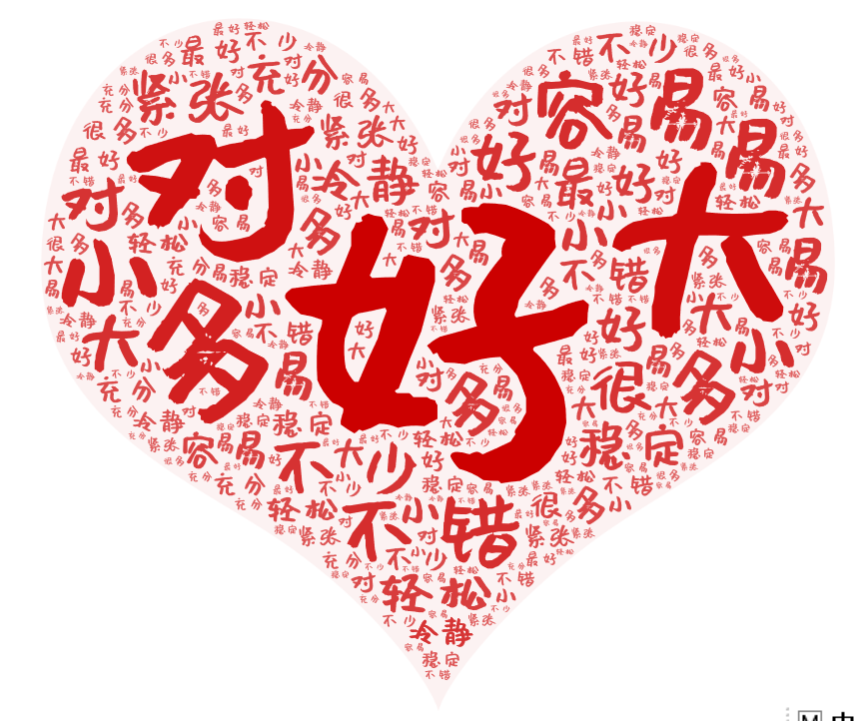